In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


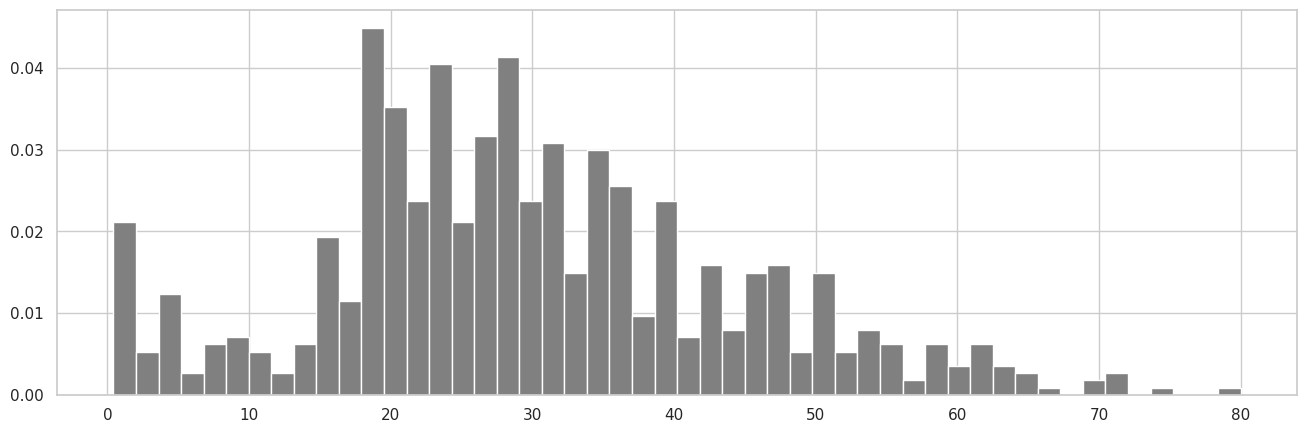

In [26]:
ages = df['Age'].dropna()
plt.figure(figsize=(16,5))
plt.hist(ages, bins=50, density=True, color='gray')
plt.show()

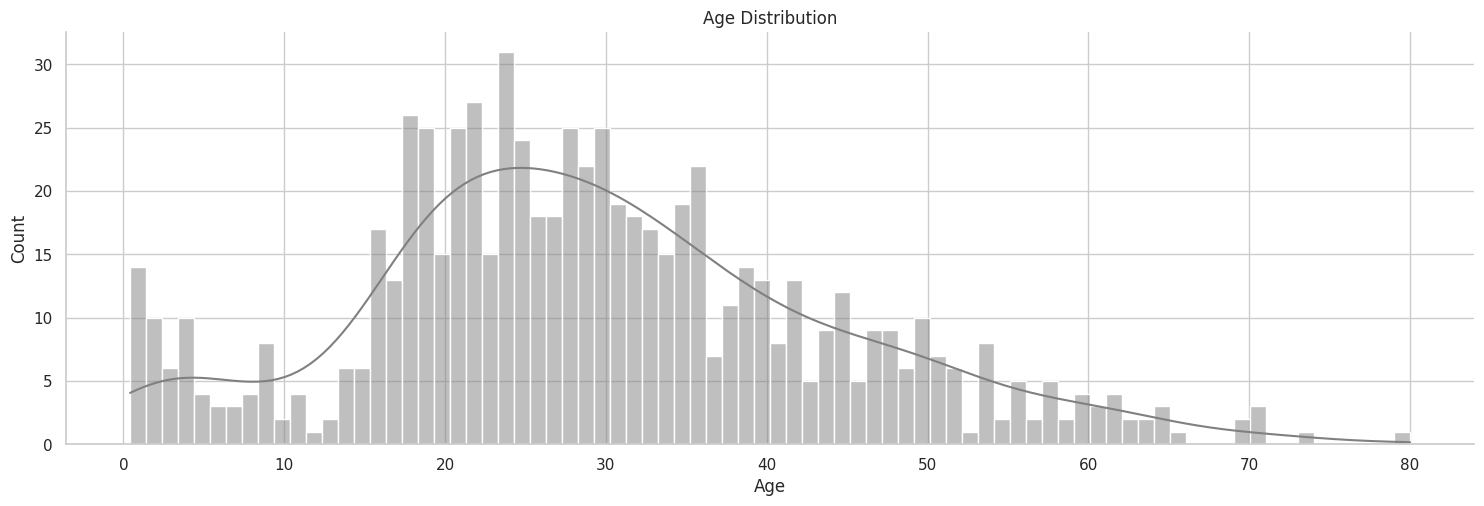

In [47]:
sns.displot(data=df, x='Age', aspect=3, bins=80, color='gray', kde=True)
plt.title('Age Distribution');

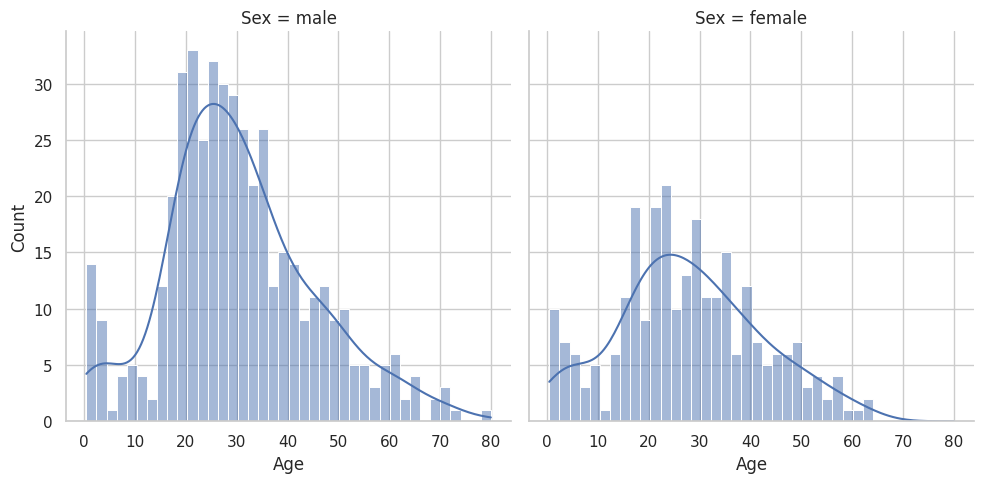

In [50]:
sns.displot(data=df, x='Age', bins=40, col='Sex', kde=True);

Text(0.5, 1.0, 'Gender distribution Among Population')

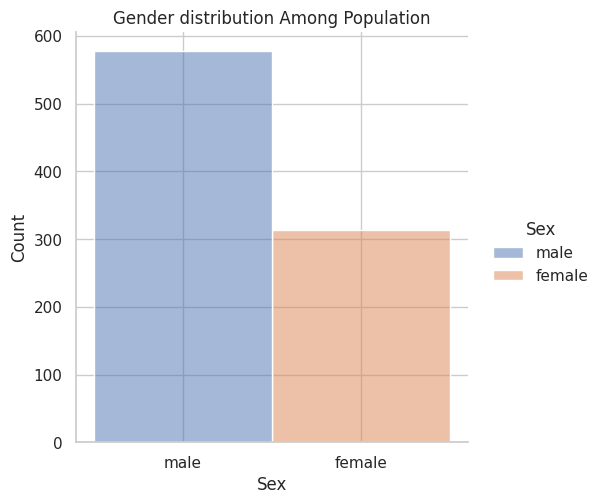

In [57]:
sns.displot(data=df, x='Sex', hue='Sex')
plt.title('Gender distribution Among Population');

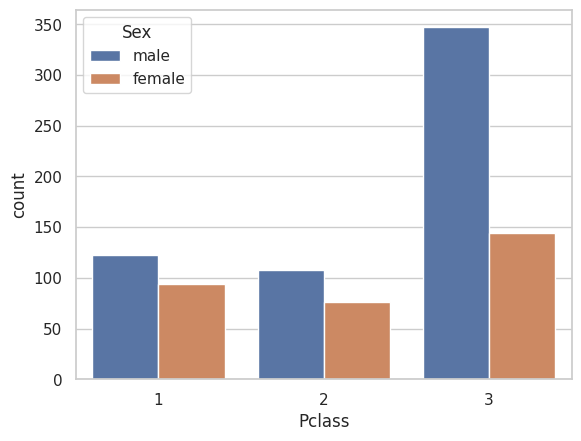

In [68]:
sns.countplot(data=df, x='Pclass', hue='Sex');

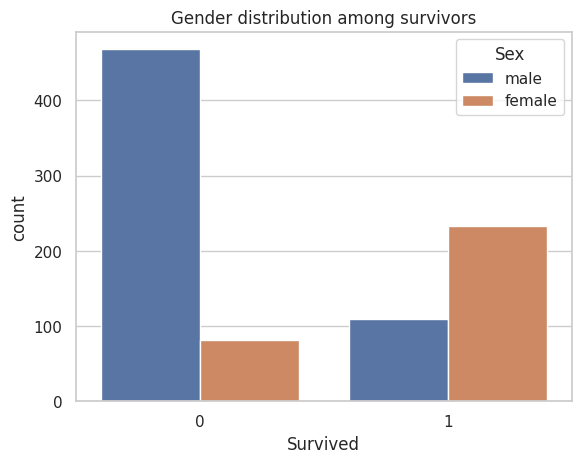

In [94]:
sns.countplot(data=df, x='Survived', hue='Sex').set(title='Gender distribution among survivors');

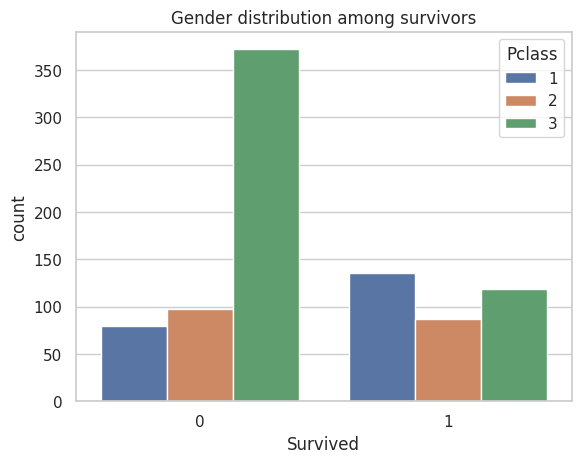

In [95]:
sns.countplot(data=df, x='Survived', hue='Pclass').set(title='Gender distribution among survivors');

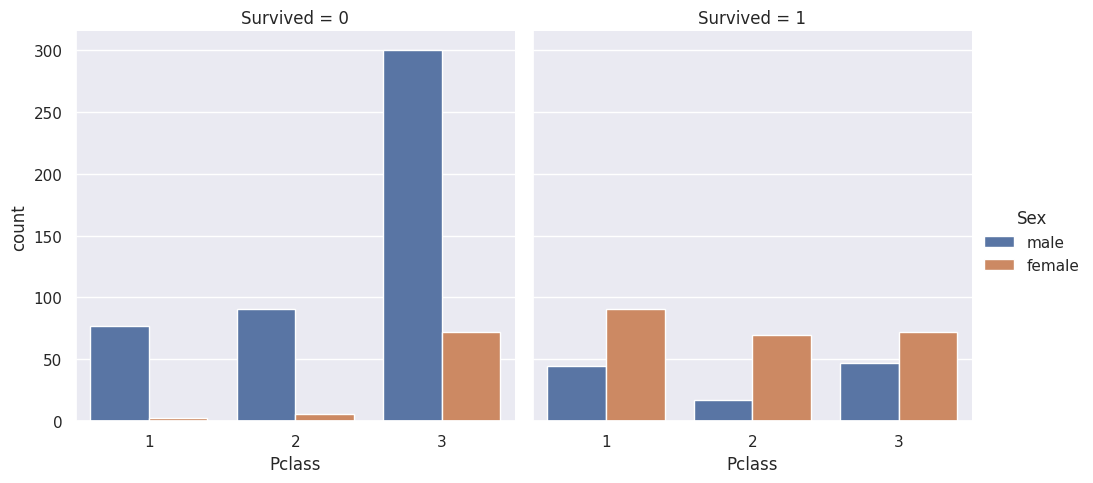

In [110]:
# sns.set(rc={'figure.figsize':(12,2)})
sns.catplot(data=df, x='Pclass', kind='count', col='Survived', hue='Sex');

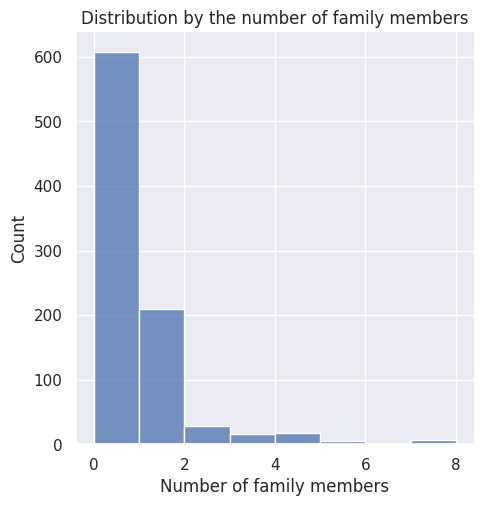

In [137]:
sns.displot(data=df, x='SibSp', bins=8).set(title='Distribution by the number of family members', xlabel='Number of family members');

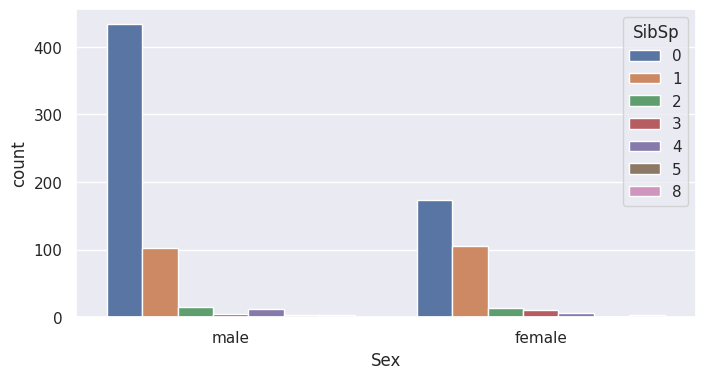

In [146]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sex', hue='SibSp');

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### O que pode determinar se a pessoa sobreviveu ou não:

- Pclass
- Sex
- Age

#### Talvez:
- Fare
- Cabin

#### Dados desnecessários:
- ticket
- PassangerId
- Name

In [4]:
df = df.drop(['Ticket', 'PassengerId', 'Name', 'Cabin'], axis=1)

In [5]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

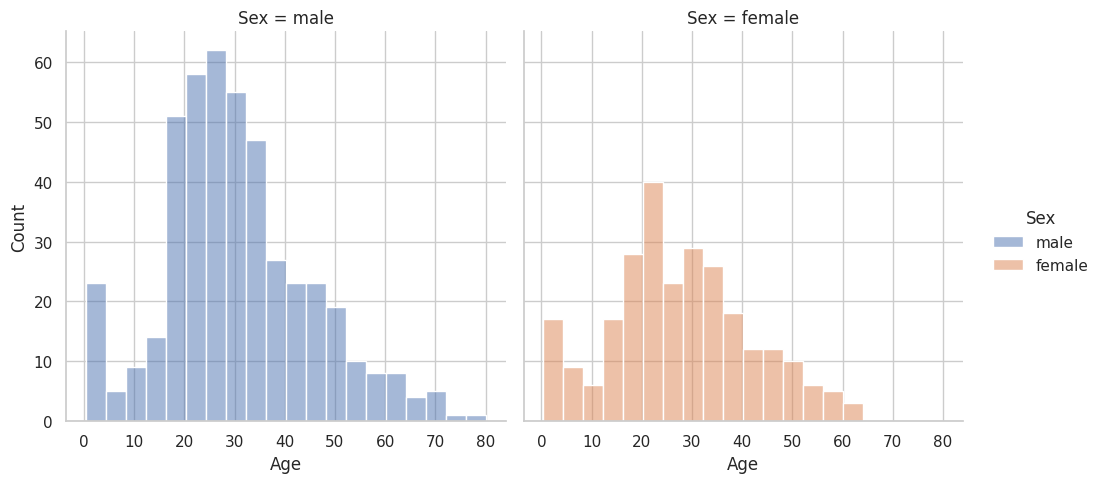

In [7]:
sns.displot(data=df, x='Age', hue='Sex', col='Sex');